In [68]:
from readlif.reader import LifFile
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

# import DBSCAn from sklearn
from sklearn.cluster import DBSCAN


In [69]:
data = LifFile('../../data/gruppo1day2.lif')
img0 = data.get_image(0)
img0 = img0.get_frame(0)

print(img0)

<PIL.Image.Image image mode=I;16 size=512x512 at 0x21F8244BA00>


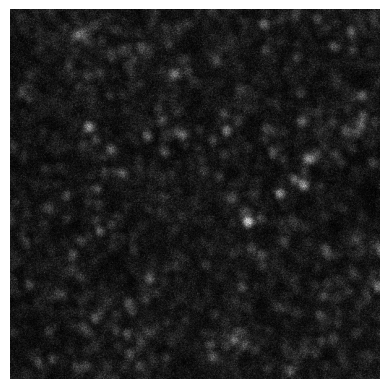

In [70]:

plt.imshow(img0, cmap='gray')
plt.axis('off')
plt.show()


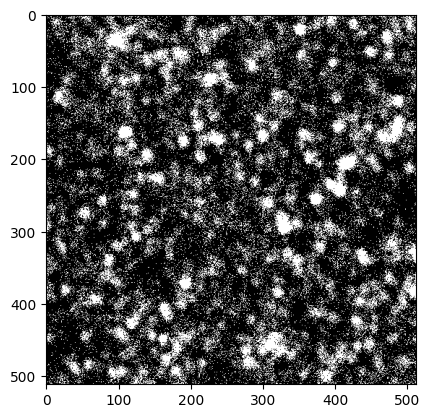

In [75]:
# adjust the image with cv2
img0_array = np.array(img0)

# subtract the background
img0_array = cv.subtract(img0_array, 100)

# threshold the image
_, img0_thresh = cv.threshold(img0_array, 60, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# make value from 0 to 1
img0_thresh = img0_thresh / 255

#plot
plt.imshow(img0_thresh, cmap='gray')

In [76]:
# 

[[1. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 1. 0.]
 ...
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [84]:
db = DBSCAN(eps=0.3, min_samples=10).fit(img0_thresh)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 0
Estimated number of noise points: 512


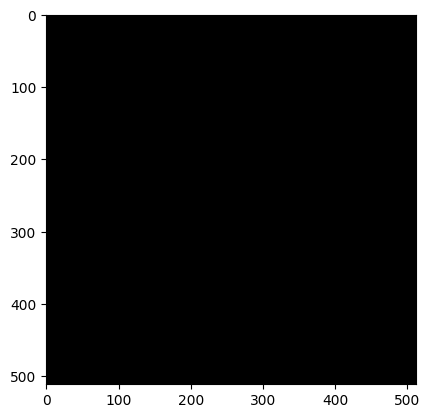

In [39]:
# Convert image to grayscale and then to numpy array
image_np = np.array(img0.convert('L'))

# Assuming that the circles are the brighter areas, we can threshold the image to find them.
# We use a high percentile to set the threshold to be sure to include only the brightest areas.
threshold = np.percentile(image_np, 66.66)
binary_image = image_np > threshold

# Label connected regions that are above the threshold
labels = measure.label(binary_image)

#plot the labeled image
plt.imshow(binary_image, cmap='gray')

In [28]:
# Now we will fit a GaussianMixture model to the labeled regions.
# We'll assume the number of components (circles) is the same as the number of labeled regions.
n_components = np.max(labels)

# We need to format our data correctly for GaussianMixture model.
# We will create an array of (x, y) coordinates for each pixel above the threshold.
X = np.column_stack(np.nonzero(binary_image))

# print frist 10 n_components
print(n_components)
print(X[:10])

9423
[[ 0  0]
 [ 0  2]
 [ 0  8]
 [ 0 10]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 27]
 [ 0 28]
 [ 0 29]]


In [ ]:
# Fit the GaussianMixture model
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X)

# Display the original image and the regions identified by the GaussianMixture model
plt.imshow(image_np, cmap='gray')
plt.title('Original Image with Circles Identified')

# Plot the centers of the GMM
plt.scatter(gmm.means_[:, 1], gmm.means_[:, 0], c='red', s=40)

# Show the plot
plt.show()

In [56]:
lam = 500
print(0.44*(lam/0.5))

440.0
